In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Step 1: User Input for Quiz Data
def get_user_input():
    print("Enter Current Quiz Data:")
    num_questions = int(input("Number of questions: "))
    current_quiz_data = {"user_id": 1, "questions": []}

    for i in range(num_questions):
        print(f"Enter details for question {i + 1}:")
        question_id = int(input("Question ID: "))
        topic = input("Topic: ")
        difficulty = input("Difficulty (Easy/Medium/Hard): ")
        correct = input("Correct (True/False): ").lower() == "true"
        current_quiz_data["questions"].append({
            "question_id": question_id, "topic": topic, "difficulty": difficulty, "correct": correct
        })

    print("\nEnter Historical Quiz Data:")
    num_quizzes = int(input("Number of historical quizzes: "))
    historical_quiz_data = []

    for i in range(num_quizzes):
        print(f"Enter details for quiz {i + 1}:")
        quiz_id = int(input("Quiz ID: "))
        score = int(input("Score: "))
        response_map = {}

        num_responses = int(input("Number of responses: "))
        for j in range(num_responses):
            question_id = int(input(f"Question ID for response {j + 1}: "))
            correct = input("Correct (True/False): ").lower() == "true"
            response_map[question_id] = correct

        historical_quiz_data.append({"quiz_id": quiz_id, "score": score, "response_map": response_map})

    return current_quiz_data, historical_quiz_data

current_quiz_data, historical_quiz_data = get_user_input()

Enter Current Quiz Data:


Number of questions:  1


Enter details for question 1:


Question ID:  1
Topic:  Structural Organisation in Animals and Plants
Difficulty (Easy/Medium/Hard):  Easy
Correct (True/False):  False



Enter Historical Quiz Data:


Number of historical quizzes:  2


Enter details for quiz 1:


Quiz ID:  2
Score:  108
Number of responses:  3
Question ID for response 1:  1
Correct (True/False):  True
Question ID for response 2:  2
Correct (True/False):  False
Question ID for response 3:  3
Correct (True/False):  True


Enter details for quiz 2:


Quiz ID:  1
Score:  108
Number of responses:  1
Question ID for response 1:  4
Correct (True/False):  True


In [13]:
# Step 2: Data Preparation
def prepare_current_quiz_df(data):
    return pd.DataFrame(data['questions'])

def prepare_historical_quiz_df(data):
    records = []
    for quiz in data:
        for qid, correct in quiz['response_map'].items():
            records.append({
                "quiz_id": quiz['quiz_id'],
                "question_id": qid,
                "correct": correct,
                "score": quiz['score']
            })
    return pd.DataFrame(records)

current_df = prepare_current_quiz_df(current_quiz_data)
historical_df = prepare_historical_quiz_df(historical_quiz_data)


In [15]:
# Step 3: Analysis
# Topic-wise Performance
def analyze_topic_performance(current_df):
    topic_summary = current_df.groupby("topic").agg({"correct": ["sum", "count"]})
    topic_summary.columns = ["correct_answers", "total_questions"]
    topic_summary["accuracy"] = topic_summary["correct_answers"] / topic_summary["total_questions"]
    return topic_summary

def analyze_difficulty_performance(current_df):
    difficulty_summary = current_df.groupby("difficulty").agg({"correct": ["sum", "count"]})
    difficulty_summary.columns = ["correct_answers", "total_questions"]
    difficulty_summary["accuracy"] = difficulty_summary["correct_answers"] / difficulty_summary["total_questions"]
    return difficulty_summary

# Historical Performance Trends
def analyze_historical_performance(historical_df):
    scores = historical_df.groupby("quiz_id")["score"].mean()
    accuracy = historical_df.groupby("quiz_id")["correct"].mean()
    return scores, accuracy

In [17]:
# Generate Insights and Recommendations
def generate_recommendations(current_topic_analysis, current_difficulty_analysis):
    recommendations = []

    # Weak Topics
    weak_topics = current_topic_analysis[current_topic_analysis['accuracy'] < 0.7]
    for topic in weak_topics.index:
        recommendations.append(f"Focus on improving performance in the topic: {topic}.")

    # Difficulty Level Insights
    if 'Hard' in current_difficulty_analysis.index and current_difficulty_analysis.loc['Hard', 'accuracy'] < 0.6:
        recommendations.append("Practice more hard-level questions to improve overall accuracy.")
    if 'Easy' in current_difficulty_analysis.index and current_difficulty_analysis.loc['Easy', 'accuracy'] > 0.9:
        recommendations.append("You excel at easy questions. Challenge yourself with medium and hard questions.")

    return recommendations

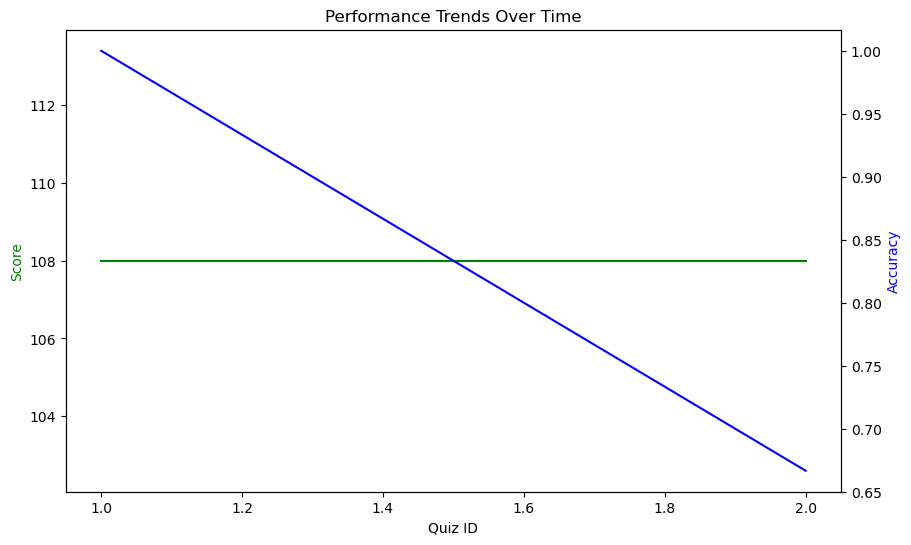

In [19]:
# Step 4: Visualizations
def plot_performance_trends(scores, accuracy):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax2 = ax1.twinx()
    ax1.plot(scores.index, scores.values, 'g-', label="Score")
    ax2.plot(accuracy.index, accuracy.values, 'b-', label="Accuracy")

    ax1.set_xlabel('Quiz ID')
    ax1.set_ylabel('Score', color='g')
    ax2.set_ylabel('Accuracy', color='b')

    plt.title('Performance Trends Over Time')
    plt.show()

# Generate Topic & Difficulty Analysis
current_topic_analysis = analyze_topic_performance(current_df)
current_difficulty_analysis = analyze_difficulty_performance(current_df)

# Generate Historical Trends
historical_scores, historical_accuracy = analyze_historical_performance(historical_df)

# Generate Recommendations
recommendations = generate_recommendations(current_topic_analysis, current_difficulty_analysis)

# Visualize Trends
plot_performance_trends(historical_scores, historical_accuracy)


In [21]:
# Display Insights
print("Current Quiz Topic Analysis:")
print(current_topic_analysis)

print("\nCurrent Quiz Difficulty Analysis:")
print(current_difficulty_analysis)

print("\nHistorical Performance Trends:")
print("Scores:")
print(historical_scores)
print("Accuracy:")
print(historical_accuracy)

print("\nRecommendations:")
for rec in recommendations:
    print(f"- {rec}")

Current Quiz Topic Analysis:
                                               correct_answers  \
topic                                                            
Structural Organisation in Animals and Plants                0   

                                               total_questions  accuracy  
topic                                                                     
Structural Organisation in Animals and Plants                1       0.0  

Current Quiz Difficulty Analysis:
            correct_answers  total_questions  accuracy
difficulty                                            
Easy                      0                1       0.0

Historical Performance Trends:
Scores:
quiz_id
1    108.0
2    108.0
Name: score, dtype: float64
Accuracy:
quiz_id
1    1.000000
2    0.666667
Name: correct, dtype: float64

Recommendations:
- Focus on improving performance in the topic: Structural Organisation in Animals and Plants.


In [23]:
# Bonus: Define Student Persona
def define_student_persona(current_topic_analysis, current_difficulty_analysis):
    strengths = current_topic_analysis[current_topic_analysis['accuracy'] > 0.8].index.tolist()
    weaknesses = current_topic_analysis[current_topic_analysis['accuracy'] < 0.7].index.tolist()

    persona = {
        "Strengths": strengths,
        "Weaknesses": weaknesses,
        "Learning Style": "Likely benefits from targeted practice and progressive difficulty increases."
    }
    return persona

student_persona = define_student_persona(current_topic_analysis, current_difficulty_analysis)

print("\nStudent Persona:")
print(student_persona)



Student Persona:
{'Strengths': [], 'Weaknesses': ['Structural Organisation in Animals and Plants'], 'Learning Style': 'Likely benefits from targeted practice and progressive difficulty increases.'}
